In [9]:
from utils import WordSurroundingsVisualizer
from word_embeddings import WordEmbeddings
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json
import os

In [14]:
import configparser 

config = configparser.ConfigParser()
config.read('config.ini')

female_words   = config['GenderSpecificWords']['female_words'].split(', ')
male_words     = config['GenderSpecificWords']['male_words'].split(', ')
output_dir     = config['Path']['output_dir']
images_dir     = config['Path']['images_dir']
embeddings_dir = config['Path']['embeddings_dir']
lang           = config['Language']['lang']

# Word surroundings visualization

In [25]:
embedding = WordEmbeddings()
embedding.load(os.path.join(embeddings_dir, 'normal.json'))
words = embedding.words

In [26]:
with open(os.path.join(output_dir, 'idc_data_man_woman_paper_horse_normal.json'), 'r') as f:
    data = json.load(f)

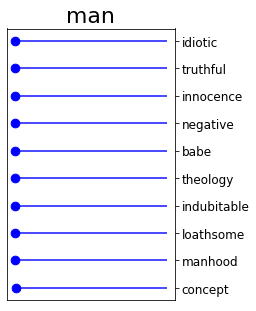

In [27]:
wsv = WordSurroundingsVisualizer('man', words, data['man'],
                                color='blue', min_step=0.001, max_step=0.9)
wsv.display()

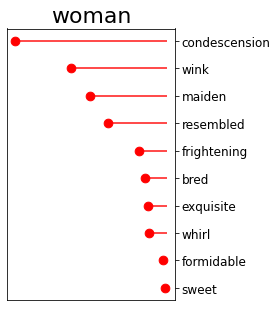

In [28]:
wsv = WordSurroundingsVisualizer('woman', words, data['woman'],
                                color='red', max_step=1)
wsv.display()

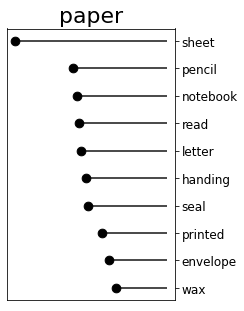

In [29]:
wsv = WordSurroundingsVisualizer('paper', words, data['paper'],
                                 min_step=0.01, max_step=2,
                                 color='black')
wsv.display()

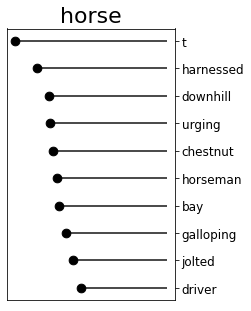

In [30]:
wsv = WordSurroundingsVisualizer('horse', words, data['horse'],
                                 max_step=1.6, decrease=0.8,
                                 color='black')
wsv.display()

In [31]:
with open(os.path.join(output_dir, 'idc_data_man_woman_paper_horse_debiased.json'), 'r') as f:
    data = json.load(f)

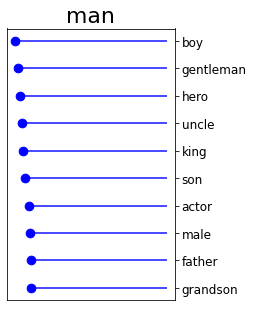

In [32]:
wsv = WordSurroundingsVisualizer('man', words, data['man'],
                                color='blue')
wsv.display()

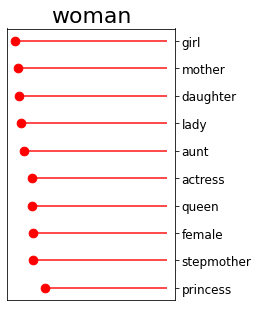

In [33]:
wsv = WordSurroundingsVisualizer('woman', words, data['woman'],
                                color='red')
wsv.display()

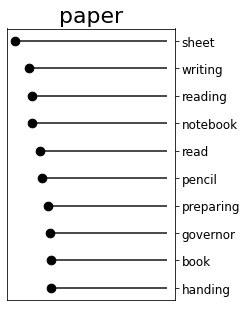

In [34]:
wsv = WordSurroundingsVisualizer('paper', words, data['paper'],
                                 min_step=0.001, max_step=1.6,
                                 color='black')
wsv.display()

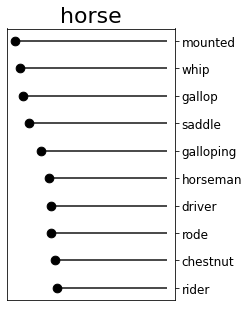

In [35]:
wsv = WordSurroundingsVisualizer('horse', words, data['horse'],
                                max_step=1.6, color='black')
wsv.display()

# Gender bias visualization

In [6]:
embeddings_normal = WordEmbeddings()
embeddings_debiased = WordEmbeddings()
embeddings_normal.load(os.path.join(embeddings_dir, 'normal.json'))
embeddings_debiased.load(os.path.join(embeddings_dir, 'debiased.json'))

In [7]:
assert embeddings_normal.words == embeddings_debiased.words
words = embeddings_normal.words.copy()

In [21]:
unbalanced_words = ['dress', 'pretty', 'lovely', 'nurse', 'sobbing',
                    'leader', 'treachery', 'skillful', 'violence', 'seniority']
unbalanced_words_ru = ['платье', 'милый', 'чудесный', 'медсестра', 'всхлип',
                    'лидер', 'измена', 'умелый', 'насилие', 'старшинство']
unbalanced_words_hybrid = ['({}) {}'.format(unbalanced_words_ru[i], unbalanced_words[i]) for i in range(10)]

In [22]:
df = pd.DataFrame(dict(zip(unbalanced_words_hybrid, [[embeddings_normal.m_dist(x) - embeddings_normal.f_dist(x),
                                              embeddings_debiased.m_dist(x) - embeddings_debiased.f_dist(x)]\
                                         for x in unbalanced_words])), index=['Normal', 'Debiased'])

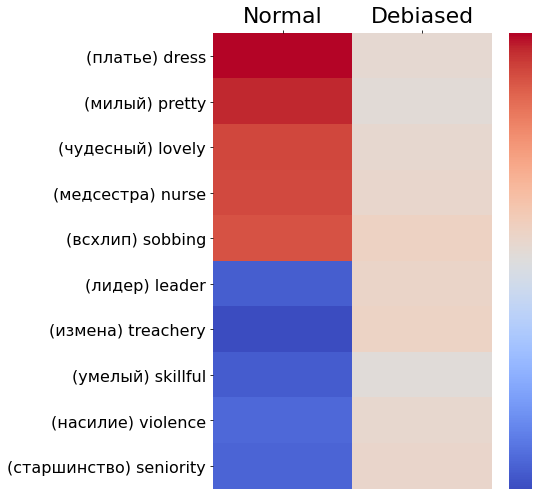

In [28]:
fig, ax = plt.subplots(figsize=(8, 7))
hm = sns.heatmap(df.T, cmap='coolwarm', ax=ax, cbar_kws={'ticks':[]})
ax.set_yticklabels(ax.get_yticklabels(), 
                          rotation=0,
                          fontdict={'fontsize':16})
ax.set_xticklabels(ax.get_xticklabels(), 
                          rotation=0, 
                          fontdict={'fontsize':22})
ax.xaxis.set_label_position("top")
ax.xaxis.tick_top()
plt.tight_layout()

In [29]:
fig.savefig(os.path.join(images_dir, 'gender_bias.jpg'), dpi=150)